<img align=left src='keras.png' width = '400'/>

**Keras** jest to wysokopoziomowe API, napisane w Pythonie które umożliwia nam programowanie biblotek TensorFlow (Google), CNTK (Microsoft), czy Theano (Montreal University). Dodatkowo kod Keras który napisaliśmy raz mozemy wykorzystać z każdą z tych bibliotek.

# Keras - sieć do rozpoznawania cyfr

*Przyklad oparty na krótkim tutorialu z Uniwersytetu w Toronto i kodzie Xaviera Snelgrove*

## Sieć Neuronowa w Keras
Importujemy niezbędne moduły

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Ładujemy dane - MNIST

In [5]:
# wgrywamy dane i dzielimy ja na training i test set
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

train_X.shape

(60000, 28, 28)

In [7]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

# zmieniamy dane pixeli na liczby zmiennoprzecinkowe
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# skalujemy wartosci pixeli do zakresu od 0 do 1
train_X = train_X / 255.
test_X = test_X / 255.

print('train_X shape:', train_X.shape)
print(test_X.shape[0], 'test samples')

train_X shape: (60000, 28, 28, 1)
10000 test samples


### Parametru naszego modelu

In [29]:
batch_size = 128 # 128 obrazki w jednym mini-batchu, średnia błędów z batcha jest podstawą do zmiany wag w sieci
num_classes = 10 # ilość klas
epochs = 10 # ilość epok (ile razy trenujemy sieć używając  naszego zestawu danych)

### Zmieniamy odpowiedzi do: one-hot format

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [30]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Przykładowa cyfra

In [31]:
y_train[867]


array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

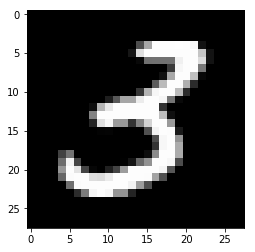

In [32]:
plt.imshow(x_train[867].reshape(28, 28), cmap='gray', interpolation='none')

In [33]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

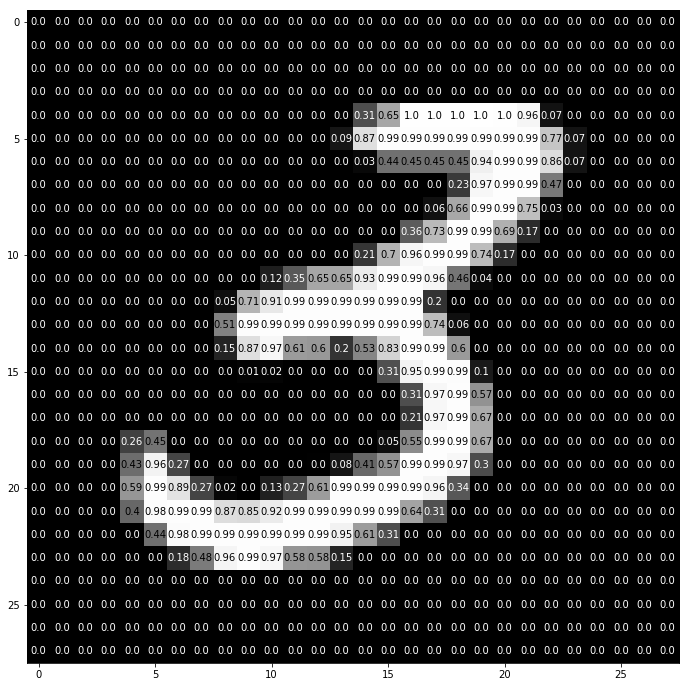

In [34]:
image = x_train[867].reshape(28, 28)

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(image, ax)

## Definiujemy nasz model

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu')) # Kernel (filtr) o rozmiarze (3, 3) Funkcja aktywacyjna, w tym wypadku reLU
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout oznacza, ze w kolejnych epokach odrzycamy część neuronów z treningu

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))# Dziękifunkcji  "softmax" odpowiedzi są w zakresie [0-1] i sumują się do 1
                                                   # czyli mogą być traktowane jako prawdopodobieństwo

## Kompilujemy nasz model
Nasz model zbudowany w Pythonie jest  optymalizowany i kompilowany do kodu maszynowego. 

Do skompilowania naszego modelu Keras potrzebuje również **loss function** i **optimizera**. 
Nasz **loss function** to *categorical crossentropy*, która dobrze nadaje sie do porównywania dwóch rozkładów prawdopodobieństwa.

Odpowiedż naszej sieci to prawdopodobieństwo, ze dana cyfra to któraś z 10 cyfr (np. "na 80% ten obrazek to cyfra '3', na 10% to '8', na 5% to '2', itd"), a targetem jest dystrybucja w której prawidlłowa odpowiedż ma 100% prawdopodobieństwa, a wszystkie inne odpowiedzi 0%.Cross-entropy jest miarą różnicy pomiędzy naszą dystrybucją prawdopodobieństwa, a prawidłową  
[Szczegóły na Wikipedii](https://en.wikipedia.org/wiki/Cross_entropy)

Optimizer decyduje, jak szybko model się uczy i zapobiega jego zatrzymaniu.  
Korzystamy z ['adadelta'](http://ruder.io/optimizing-gradient-descent/index.html#adadelta)

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Trenujemy naszą sieć!

In [37]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 210s 3ms/step - loss: 0.2305 - acc: 0.9287 - val_loss: 0.0499 - val_acc: 0.9837
Epoch 2/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0824 - acc: 0.9758 - val_loss: 0.0385 - val_acc: 0.9866
Epoch 3/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0634 - acc: 0.9808 - val_loss: 0.0314 - val_acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0510 - acc: 0.9843 - val_loss: 0.0305 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0439 - acc: 0.9861 - val_loss: 0.0320 - val_acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0367 - acc: 0.9881 - val_loss: 0.0280 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 3670s 61ms/step - loss: 0.0342 - acc: 0.9896 - val_loss: 0.0297 

### Zapisujemy naszą wytrenowaną sieć

In [38]:
model.save('mnist_cnn.h5')

## Sprawdzamy, czy nasza sieć działa

In [39]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score)

10000/10000 [==============================] - 11s 1ms/step
Test loss: [0.027657160384658073, 0.99160000000000004]


### Sprawdzamy czy sieć się czegoś nauczyła

In [40]:
from keras.preprocessing import image
def prepare_img(picture_path):
    img = image.load_img(path=picture_path,grayscale=True,target_size=(28,28))
    img = 255 - image.img_to_array(img)
    test_img = img.reshape((1,28,28,1))
    return test_img

In [41]:
for i in range(10):
    ob = "C:/Users/ajankows/Desktop/python/obrazki_dane/"+str(i)+".png"
    obrazek = prepare_img(ob)
    print(ob, model.predict_classes(obrazek))

C:/Users/ajankows/Desktop/python/obrazki_dane/0.png [0]
C:/Users/ajankows/Desktop/python/obrazki_dane/1.png [1]
C:/Users/ajankows/Desktop/python/obrazki_dane/2.png [2]
C:/Users/ajankows/Desktop/python/obrazki_dane/3.png [3]
C:/Users/ajankows/Desktop/python/obrazki_dane/4.png [4]
C:/Users/ajankows/Desktop/python/obrazki_dane/5.png [5]
C:/Users/ajankows/Desktop/python/obrazki_dane/6.png [6]
C:/Users/ajankows/Desktop/python/obrazki_dane/7.png [3]
C:/Users/ajankows/Desktop/python/obrazki_dane/8.png [8]
C:/Users/ajankows/Desktop/python/obrazki_dane/9.png [9]


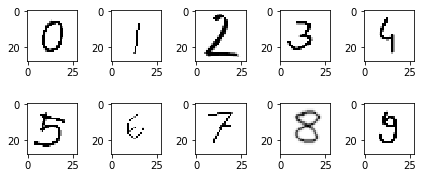

In [46]:
for i in range(10):
    plt.subplot(3,5,i+1)
    ob = "C:/Users/ajankows/Desktop/python/obrazki_dane/"+str(i)+".png"
    obrazek = prepare_img(ob)
    plt.imshow(obrazek.reshape(28,28), cmap='Greys', interpolation='None')
    ax = plt.gca()
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)
    plt.tight_layout()

In [60]:
odp = model.predict(obrazek)
print(f'odpowiedz sieci zwraca one-hot encoding: {odp}')
odp = list(odp[0])
for i, j in enumerate(odp):
    if j == 1:
        print(f'odpowiedz sieci to: {i}')

odpowiedz sieci zwraca one-hot encoding: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
odpowiedz sieci to: 9


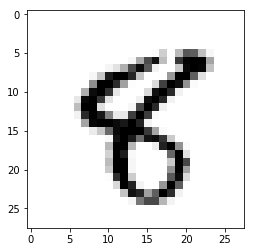

In [48]:
numerek = 84
num = x_test[numerek].reshape(1,28,28,1)
plt.imshow(x_test[numerek].reshape(28,28), cmap='Greys', interpolation='None')


In [30]:
predicted_c = model.predict_classes(num)
predict = model.predict(num)
for i in list(predict[0]):
    print(f'{i}')
# odp = model.predict(test)
# print(f'odpowiedz sieci zwraca one-hot encoding: {odp}')
print(predicted_c)

0.001522087142802775
0.0026579045224934816
0.002110422356054187
0.0005943329306319356
0.06135924905538559
0.15069304406642914
0.024026747792959213
0.0005212072283029556
0.7234604358673096
0.03305456414818764
[8]


In [49]:
model.predict_classes(num)

array([8], dtype=int64)